# Coursera Capstone Project- Car accident severity
## Introduction(Business Problem)
The main business problem is about collisions in Seattle and conditions causing them. Intention is to build predictive model which will provide reasonable prediction if under certain condition is higher probability of collisions with certain severity (certain places on exact days) and which are the mostly involved on collision.
Audience consists of people who lives in Seattle or travel through it and goal is to provide them information about current situation on a roads and possible dangers.
Audience should be interested in this problem because knowing the relationships between conditions and likelihood of collision can save their money and life.

## Data
This is a city car accident dataset, which covers the city of Seattle. The data set contains the road conditions, types of collisions, weather conditions, light conditions, type of junction and the severity code.
The data can be found at: https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Some entries were missing crucial data that were required. Some columns were filled with “Unknown “in some columns. To rectify, I dropped the entire row.


In [1]:
import pandas as pd
df=pd.read_csv("C:/Users/DELL/Downloads/Data-Collisions.csv")

df

C:\Users\DELL\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,2,-122.290826,47.565408,219543,309534,310814,E871089,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,24,From opposite direction - both moving - head-on,0,0,N
194669,1,-122.344526,47.690924,219544,309085,310365,E876731,Matched,Block,NaN,...,Wet,Daylight,NaN,NaN,NaN,13,From same direction - both going straight - bo...,0,0,N
194670,2,-122.306689,47.683047,219545,311280,312640,3809984,Matched,Intersection,24760.0,...,Dry,Daylight,NaN,NaN,NaN,28,From opposite direction - one left turn - one ...,0,0,N
194671,2,-122.355317,47.678734,219546,309514,310794,3810083,Matched,Intersection,24349.0,...,Dry,Dusk,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,4308,0,N


## Data Cleaning
So, lets drop the unwanted columns.

In [2]:
df.drop(['OBJECTID', 'REPORTNO', 'STATUS', 'INTKEY', 'LOCATION', 'EXCEPTRSNDESC', 'EXCEPTRSNCODE', 'PEDCYLCOUNT', 'PEDCOUNT', 'INCDTTM', 'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY'], axis=1, inplace=True)
df

,SEVERITYCODE,X,Y,INCKEY,COLDETKEY,ADDRTYPE,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,INCDATE,JUNCTIONTYPE,SDOT_COLCODE,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,HITPARKEDCAR
0,2,-122.323148,47.703140,1307,1307,Intersection,2,Injury Collision,Angles,2,2,2013/03/27 00:00:00+00,At Intersection (intersection related),11,Overcast,Wet,Daylight,10,N
1,1,-122.347294,47.647172,52200,52200,Block,1,Property Damage Only Collision,Sideswipe,2,2,2006/12/20 00:00:00+00,Mid-Block (not related to intersection),16,Raining,Wet,Dark - Street Lights On,11,N
2,1,-122.334540,47.607871,26700,26700,Block,1,Property Damage Only Collision,Parked Car,4,3,2004/11/18 00:00:00+00,Mid-Block (not related to intersection),14,Overcast,Dry,Daylight,32,N
3,1,-122.334803,47.604803,1144,1144,Block,1,Property Damage Only Collision,Other,3,3,2013/03/29 00:00:00+00,Mid-Block (not related to intersection),11,Clear,Dry,Daylight,23,N
4,2,-122.306426,47.545739,17700,17700,Intersection,2,Injury Collision,Angles,2,2,2004/01/28 00:00:00+00,At Intersection (intersection related),11,Raining,Wet,Daylight,10,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,2,-122.290826,47.565408,309534,310814,Block,2,Injury Collision,Head On,3,2,2018/11/12 00:00:00+00,Mid-Block (not related to intersection),11,Clear,Dry,Daylight,24,N
194669,1,-122.344526,47.690924,309085,310365,Block,1,Property Damage Only Collision,Rear Ended,2,2,2018/12/18 00:00:00+00,Mid-Block (not related to intersection),14,Raining,Wet,Daylight,13,N
194670,2,-122.306689,47.683047,311280,312640,Intersection,2,Injury Collision,Left Turn,3,2,2019/01/19 00:00:00+00,At Intersection (intersection related),11,Clear,Dry,Daylight,28,N
194671,2,-122.355317,47.678734,309514,310794,Intersection,2,Injury Collision,Cycles,2,1,2019/01/15 00:00:00+00,At Intersection (intersection related),51,Clear,Dry,Dusk,5,N


Remove the unwanted rows which have the NaN or unknown values.

In [3]:
nan_value=float("NaN")
df.replace("", nan_value, inplace=True)
df.replace("Unknown", nan_value, inplace=True)
df.dropna(subset=['X', 'Y', 'JUNCTIONTYPE', 'WEATHER', 'LIGHTCOND', 'ST_COLCODE', 'ROADCOND', 'HITPARKEDCAR', 'SDOT_COLCODE', 'INCDATE', 'VEHCOUNT', 'PERSONCOUNT', 'COLLISIONTYPE', 'SEVERITYCODE', 'ADDRTYPE', 'INCKEY', 'COLDETKEY'], inplace=True)
df.reset_index(inplace = True, drop = True)
df['INCDATE'] = df['INCDATE'].astype('datetime64[ns]')
df

,SEVERITYCODE,X,Y,INCKEY,COLDETKEY,ADDRTYPE,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,INCDATE,JUNCTIONTYPE,SDOT_COLCODE,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,HITPARKEDCAR
0,2,-122.323148,47.703140,1307,1307,Intersection,2,Injury Collision,Angles,2,2,2013-03-27,At Intersection (intersection related),11,Overcast,Wet,Daylight,10,N
1,1,-122.347294,47.647172,52200,52200,Block,1,Property Damage Only Collision,Sideswipe,2,2,2006-12-20,Mid-Block (not related to intersection),16,Raining,Wet,Dark - Street Lights On,11,N
2,1,-122.334540,47.607871,26700,26700,Block,1,Property Damage Only Collision,Parked Car,4,3,2004-11-18,Mid-Block (not related to intersection),14,Overcast,Dry,Daylight,32,N
3,1,-122.334803,47.604803,1144,1144,Block,1,Property Damage Only Collision,Other,3,3,2013-03-29,Mid-Block (not related to intersection),11,Clear,Dry,Daylight,23,N
4,2,-122.306426,47.545739,17700,17700,Intersection,2,Injury Collision,Angles,2,2,2004-01-28,At Intersection (intersection related),11,Raining,Wet,Daylight,10,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165181,2,-122.290826,47.565408,309534,310814,Block,2,Injury Collision,Head On,3,2,2018-11-12,Mid-Block (not related to intersection),11,Clear,Dry,Daylight,24,N
165182,1,-122.344526,47.690924,309085,310365,Block,1,Property Damage Only Collision,Rear Ended,2,2,2018-12-18,Mid-Block (not related to intersection),14,Raining,Wet,Daylight,13,N
165183,2,-122.306689,47.683047,311280,312640,Intersection,2,Injury Collision,Left Turn,3,2,2019-01-19,At Intersection (intersection related),11,Clear,Dry,Daylight,28,N
165184,2,-122.355317,47.678734,309514,310794,Intersection,2,Injury Collision,Cycles,2,1,2019-01-15,At Intersection (intersection related),51,Clear,Dry,Dusk,5,N


## Data visualization using matplotlib
Lets see in what weather most number of collisions happened. 

In [55]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')
df_tmp = df.groupby(['WEATHER']).count().reset_index()
df_tmp.drop(['SEVERITYCODE','X','Y','INCKEY','COLDETKEY','SEVERITYDESC','COLLISIONTYPE','PERSONCOUNT','VEHCOUNT','INCDATE', 'ADDRTYPE', 'ROADCOND', 'SDOT_COLCODE', 'LIGHTCOND', 'HITPARKEDCAR','ST_COLCODE', 'JUNCTIONTYPE'], axis=1, inplace=True)
df_tmp.rename(columns={'SEVERITYCODE.1':'No. of collisions'}, inplace=True)
df_tmp.set_index('WEATHER', inplace=True)
df_tmp

,No. of collisions
WEATHER,
Blowing Sand/Dirt,43
Clear,105871
Fog/Smog/Smoke,535
Other,240
Overcast,26182
Partly Cloudy,5
Raining,31365
Severe Crosswind,24
Sleet/Hail/Freezing Rain,110


Following graph shows in what weather most number of collisions happened.

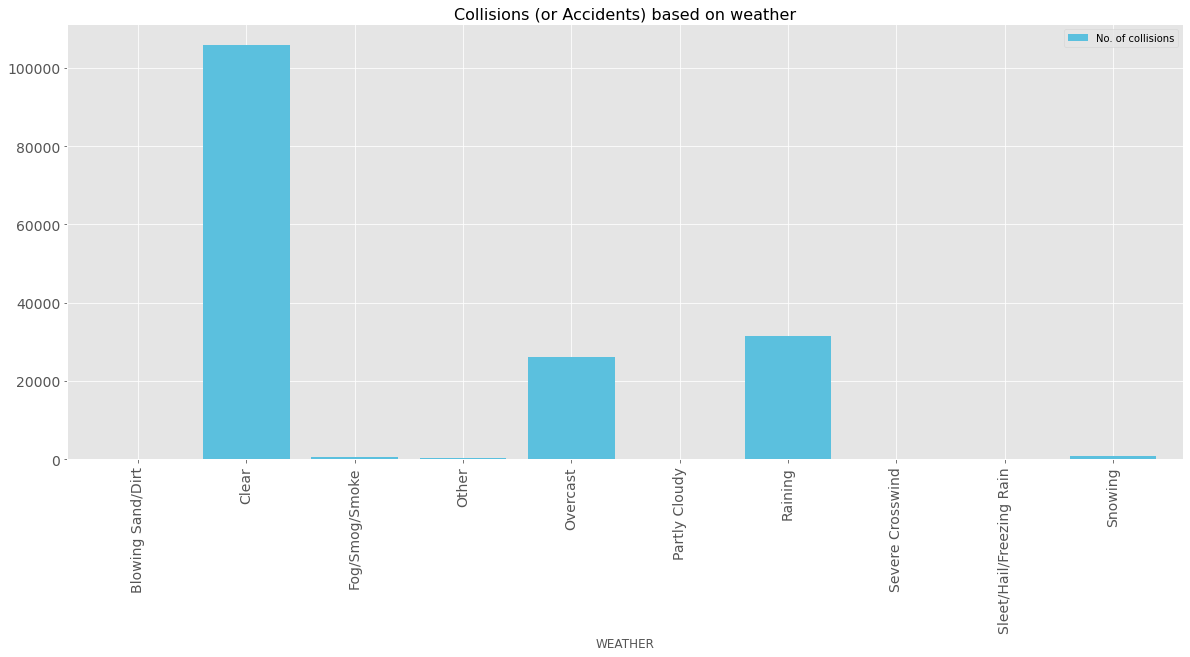

In [56]:
ax=df_tmp.plot(kind='bar', figsize=(20,8), width=0.8, color=['#5bc0de'], fontsize=14)
plt.title("Collisions (or Accidents) based on weather", fontsize=16)

#ax.set_facecolor((1.0, 1.0, 1.0))
#y_axis = ax.axes.get_yaxis()
#y_axis.set_visible(False)

plt.show()

From this, we can say that most number of collisions happened in the clear weather.

In [59]:
df_tmp1 = df.groupby(['COLLISIONTYPE']).count().reset_index()
df_tmp1.drop(['SEVERITYCODE','X','Y','INCKEY','COLDETKEY','SEVERITYDESC','PERSONCOUNT','VEHCOUNT','INCDATE', 'ADDRTYPE', 'ROADCOND', 'SDOT_COLCODE', 'LIGHTCOND', 'HITPARKEDCAR','ST_COLCODE', 'JUNCTIONTYPE'], axis=1, inplace=True)
df_tmp1.rename(columns={'SEVERITYCODE.1':'No. of collisions'}, inplace=True)
df_tmp1.set_index('COLLISIONTYPE', inplace=True)
df_tmp1

,No. of collisions
COLLISIONTYPE,
Angles,33644
Cycles,5171
Head On,1931
Left Turn,13303
Other,21044
Parked Car,32390
Pedestrian,6241
Rear Ended,31627
Right Turn,2775


Following graph shows the type of collision happened mostly.

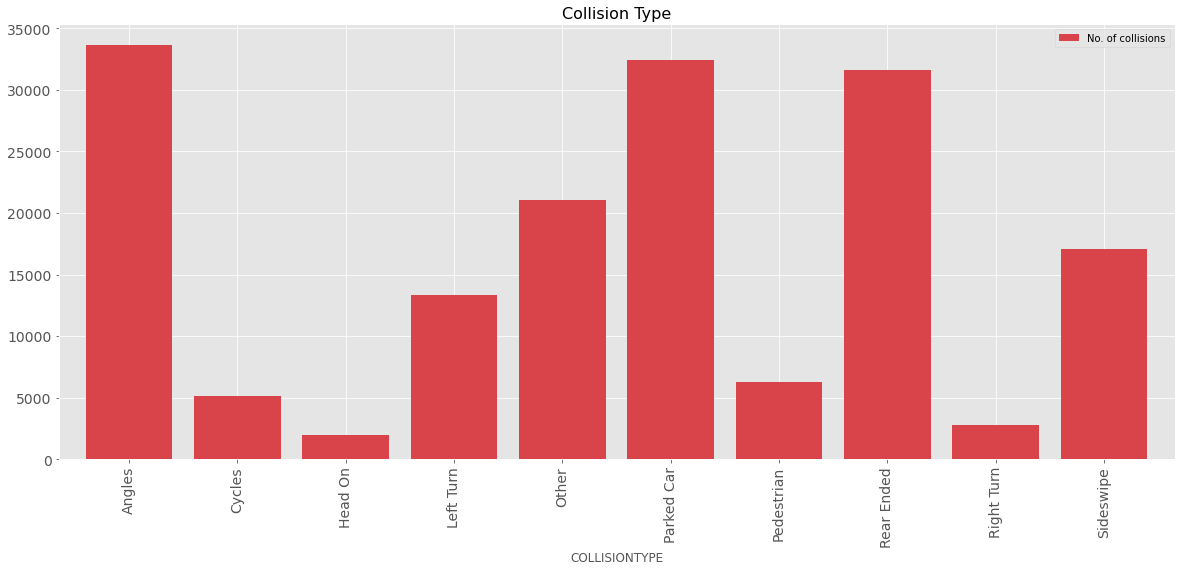

In [61]:
ax=df_tmp1.plot(kind='bar', figsize=(20,8), width=0.8, color=['#d9434a'], fontsize=14)
plt.title("Collision Type", fontsize=16)

#ax.set_facecolor((1.0, 1.0, 1.0))
#y_axis = ax.axes.get_yaxis()
#y_axis.set_visible(False)

plt.show()

Lets see the yearwise no. of collisons from 2004 to 2020

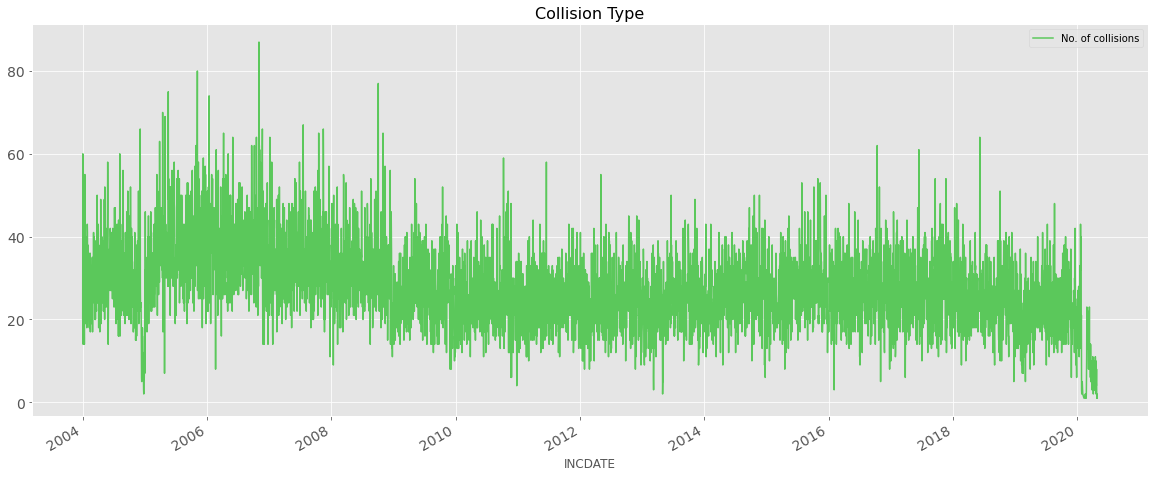

In [73]:
df_tmp2 = df.groupby(['INCDATE']).count().reset_index()
df_tmp2.drop(['SEVERITYCODE','X','Y','INCKEY','COLDETKEY','SEVERITYDESC','PERSONCOUNT','COLLISIONTYPE', 'VEHCOUNT', 'ADDRTYPE', 'ROADCOND', 'SDOT_COLCODE', 'LIGHTCOND', 'HITPARKEDCAR','ST_COLCODE', 'JUNCTIONTYPE'], axis=1, inplace=True)
df_tmp2.rename(columns={'SEVERITYCODE.1':'No. of collisions'}, inplace=True)
df_tmp2.set_index('INCDATE', inplace=True)

ax=df_tmp2.plot(kind='line', figsize=(20,8), color=['#5bc85b'], fontsize=14)
plt.title("Collision Type", fontsize=16)

#ax.set_facecolor((1.0, 1.0, 1.0))
#y_axis = ax.axes.get_yaxis()
#y_axis.set_visible(False)

plt.show()


## Predictive Modelling
For predictive modelling we will take three main columns, weather, road condition and severity.

In [4]:
test_df=df[['WEATHER', 'ROADCOND', 'SEVERITYCODE']]
test_df

,WEATHER,ROADCOND,SEVERITYCODE
0,Overcast,Wet,2
1,Raining,Wet,1
2,Overcast,Dry,1
3,Clear,Dry,1
4,Raining,Wet,2
...,...,...,...
165181,Clear,Dry,2
165182,Raining,Wet,1
165183,Clear,Dry,2
165184,Clear,Dry,2


Now, weather and road conditions have various types, so we will convert them into good and bad.

In [5]:
test_df['ROADCOND'].replace(to_replace=['Wet','Dry','Unknown','Snow/Slush','Ice','Other','Sand/Mud/Dirt','Standing Water','Oil'], value = ['Bad','Good','Good','Bad','Bad','Good','Bad','Bad','Bad'], inplace=True)
test_df['WEATHER'].replace(to_replace=['Overcast', 'Raining', 'Clear', 'Other', 'Blowing Sand/Dirt', 'Snowing', 'Severe Crosswind', 'Sleet/Hail/Freezing Rain', 'Fog/Smog/Smoke', 'Partly Cloudy'], value=['Good', 'Bad', 'Good', 'Bad', 'Bad', 'Good', 'Bad', 'Bad', 'Bad', 'Good'], inplace=True)
test_df

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,WEATHER,ROADCOND,SEVERITYCODE
0,Good,Bad,2
1,Bad,Bad,1
2,Good,Good,1
3,Good,Good,1
4,Bad,Bad,2
...,...,...,...
165181,Good,Good,2
165182,Bad,Bad,1
165183,Good,Good,2
165184,Good,Good,2


Now, since weather and road condition are categorical columns, lets convert them to numeric values since machine learning models mainly uses numerical values.

In [6]:
test_df["WEATHER"].replace(to_replace=['Good', 'Bad'], value=[0,1], inplace=True)
test_df['ROADCOND'].replace(to_replace=['Good','Bad'],value=[0,1],inplace=True)
test_df1=test_df[['WEATHER', 'ROADCOND']]

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


## Data Analysis

Weather Test:- The Accident Severity/L2 is higher on '1' which means with Weather severity increases

In [7]:
weather_analysis = test_df.groupby(['WEATHER'])['SEVERITYCODE'].value_counts(normalize=True)
weather_analysis

WEATHER  SEVERITYCODE
0        1               0.671692
         2               0.328308
1        1               0.657889
         2               0.342111
Name: SEVERITYCODE, dtype: float64

Road Conditions Test:- The Accident Severity/L2 is higher on '1' which means with worser road conditions severity increases

In [8]:
road_analysis = test_df.groupby(['ROADCOND'])['SEVERITYCODE'].value_counts(normalize=True)
road_analysis

ROADCOND  SEVERITYCODE
0         1               0.670220
          2               0.329780
1         1               0.665883
          2               0.334117
Name: SEVERITYCODE, dtype: float64

#### Road Conditions and Weather certainly have a big effect on accident severity

In [11]:
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
from sklearn import preprocessing

x = test_df1
y = test_df['SEVERITYCODE'].values.astype(str)
x = preprocessing.StandardScaler().fit(x).transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1234)

print("Training set: ", x_train.shape, y_train.shape)
print("Testing set: ", x_test.shape, y_test.shape)

Training set:  (132148, 2) (132148,)
Testing set:  (33038, 2) (33038,)


## KNN Model

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

KNN_model = KNeighborsClassifier(n_neighbors = 4).fit(x_train, y_train)
predicted = KNN_model.predict(x_test)

## Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier

Tree_model = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
Tree_model.fit(x_train, y_train)
predicted = Tree_model.predict(x_test)

## Logistic Regression

In [110]:
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression(C=0.01, solver='liblinear').fit(x_train, y_train)
predicted = LR_model.predict(x_test)

F1 score (log):  0.5333204189555325
Accuracy socre(log):  0.6666565772746534


# Results

## KNN Model

In [13]:
print("F1 score (KNN): ", f1_score(y_test, predicted, average='weighted'))
print("Accuracy socre(KNN): ", accuracy_score(y_test, predicted))

F1 score (KNN):  0.5333204189555325
Accuracy socre(KNN):  0.6666565772746534


## Decision Tree

In [15]:
print("F1 score (Tree): ", f1_score(y_test, predicted, average='weighted'))
print("Accuracy socre(Tree): ", accuracy_score(y_test, predicted))

F1 score (Tree):  0.5333204189555325
Accuracy socre(Tree):  0.6666565772746534


## Logistic Regression

In [16]:
print("F1 score (log): ", f1_score(y_test, predicted, average='weighted'))
print("Accuracy socre(log): ", accuracy_score(y_test, predicted))

F1 score (log):  0.5333204189555325
Accuracy socre(log):  0.6666565772746534


So, with these we can say that weather and road conditions leads to a higher crash rates and have a imperical effect on severity.

# Conclusion


The model provides enough evidence to show to the tremendous effect of Road Conditions and Weather on Severity of Car Accidents in Seattle.